<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sandford+-2020,-Section-5:--Forecasted-Precision-of-Future-Instruments" data-toc-modified-id="Sandford+-2020,-Section-5:--Forecasted-Precision-of-Future-Instruments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sandford+ 2020, Section 5: <br> Forecasted Precision of Future Instruments</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plotting-Configs" data-toc-modified-id="Plotting-Configs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting Configs</a></span></li><li><span><a href="#Figure-12:-JWST-CRLBs" data-toc-modified-id="Figure-12:-JWST-CRLBs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Figure 12: JWST CRLBs</a></span></li><li><span><a href="#Figure-13:-Low-Resolution-ELT-CRLBs" data-toc-modified-id="Figure-13:-Low-Resolution-ELT-CRLBs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Figure 13: Low-Resolution ELT CRLBs</a></span></li><li><span><a href="#Figure-14:-High-Resolution-ELT-CRLBs" data-toc-modified-id="Figure-14:-High-Resolution-ELT-CRLBs-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Figure 14: High-Resolution ELT CRLBs</a></span></li><li><span><a href="#Figure-15:-Extragalctic-Surveys" data-toc-modified-id="Figure-15:-Extragalctic-Surveys-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Figure 15: Extragalctic Surveys</a></span></li></ul></li></ul></div>

# Sandford+ 2020, Section 5: <br> Forecasted Precision of Future Instruments
## Imports 

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from astropy.io import fits

from chemicalc import instruments as inst
from chemicalc import reference_spectra as ref
from chemicalc import s2n
from chemicalc.crlb import init_crlb_df, calc_crlb, sort_crlb
from chemicalc.plot import plot_crlb

from IPython.utils import io

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import StrMethodFormatter
from matplotlib.lines import Line2D
%matplotlib inline

## Plotting Configs

In [2]:
output_dir = './figures/'

mpl.rc('axes', grid=True, lw=2)
mpl.rc('ytick', direction='in', labelsize=10)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('xtick', direction='in', labelsize=10)
mpl.rc('xtick.major', size=5, width=1)
mpl.rc('ytick', direction='in', labelsize=10)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('grid', alpha=0.75, lw=1)
mpl.rc('legend', edgecolor='k', framealpha=1, fancybox=False)
mpl.rc('figure', dpi=300)

## Figure 12: JWST CRLBs

In [3]:
# Initialize Preset Instrument
G140M_F070LP = inst.AllInst.get_spectrograph('NIRSpec G140M/F070LP')
G140M_F100LP = inst.AllInst.get_spectrograph('NIRSpec G140M/F100LP')
G140H_F070LP = inst.AllInst.get_spectrograph('NIRSpec G140H/F070LP')
G140H_F100LP = inst.AllInst.get_spectrograph('NIRSpec G140H/F100LP')

# Initialize Reference Spectra
TRGB = ref.ReferenceSpectra(reference='TRGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
TRGB.convolve(G140M_F070LP)
TRGB.convolve(G140M_F100LP)
TRGB.convolve(G140H_F070LP)
TRGB.convolve(G140H_F100LP)

# Calculate Gradient Spectra
TRGB.calc_gradient(G140M_F070LP)
TRGB.calc_gradient(G140M_F100LP)
TRGB.calc_gradient(G140H_F070LP)
TRGB.calc_gradient(G140H_F100LP)


# Set S/N for All Instruments
hdul_m070 = fits.open('./etc_files/jwst_m070_v21.0_trgb.fits')
hdul_m100 = fits.open('./etc_files/jwst_m100_v21.0_trgb.fits')
hdul_h070 = fits.open('./etc_files/jwst_h070_v21.0_trgb.fits')
hdul_h100 = fits.open('./etc_files/jwst_h100_v21.0_trgb.fits')
snr_G140M_F070LP = np.array([hdul_m070[1].data['WAVELENGTH']*1e4, hdul_m070[1].data['SN']])
snr_G140M_F100LP = np.array([hdul_m100[1].data['WAVELENGTH']*1e4, hdul_m100[1].data['SN']])
snr_G140H_F070LP = np.array([hdul_h070[1].data['WAVELENGTH']*1e4, hdul_h070[1].data['SN']])
snr_G140H_F100LP = np.array([hdul_h100[1].data['WAVELENGTH']*1e4, hdul_h100[1].data['SN']])
snr_G140M_F070LP[1][np.isinf(snr_G140M_F070LP[1])] = 0
snr_G140M_F100LP[1][np.isinf(snr_G140M_F100LP[1])] = 0
snr_G140H_F070LP[1][np.isinf(snr_G140H_F070LP[1])] = 0
snr_G140H_F100LP[1][np.isinf(snr_G140H_F100LP[1])] = 0
G140M_F070LP.set_snr(snr_G140M_F070LP, fill_value='extrapolate')
G140M_F100LP.set_snr(snr_G140M_F100LP, fill_value='extrapolate')
G140H_F070LP.set_snr(snr_G140H_F070LP, fill_value='extrapolate')
G140H_F100LP.set_snr(snr_G140H_F100LP, fill_value='extrapolate')


# Initialize CRLB Data Frames
CRLB_jwst = init_crlb_df(TRGB)

# Calculate CRLBs
CRLB_jwst[G140H_F100LP.name] = calc_crlb(TRGB, G140H_F100LP)
CRLB_jwst[G140H_F070LP.name] = calc_crlb(TRGB, G140H_F070LP)
CRLB_jwst[G140M_F100LP.name] = calc_crlb(TRGB, G140M_F100LP)
CRLB_jwst[G140M_F070LP.name] = calc_crlb(TRGB, G140M_F070LP)

# Sort CRLBs & Pretty Up Indices
CRLB_jwst = sort_crlb(CRLB_jwst, cutoff=0.3, fancy_labels=True)

/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/utils.py:160: UserWarning: outwave ((9700.0, 18005.719617909108)) extends beyond input wave ((3000.0040572, 17999.9801449))
  UserWarning
/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/utils.py:160: UserWarning: outwave ((9700.0, 18001.998470003655)) extends beyond input wave ((3000.0040572, 17999.9801449))
  UserWarning
/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/crlb.py:82: RuntimeWarning: divide by zero encountered in power
  flux_var = instrument.snr ** (-2)


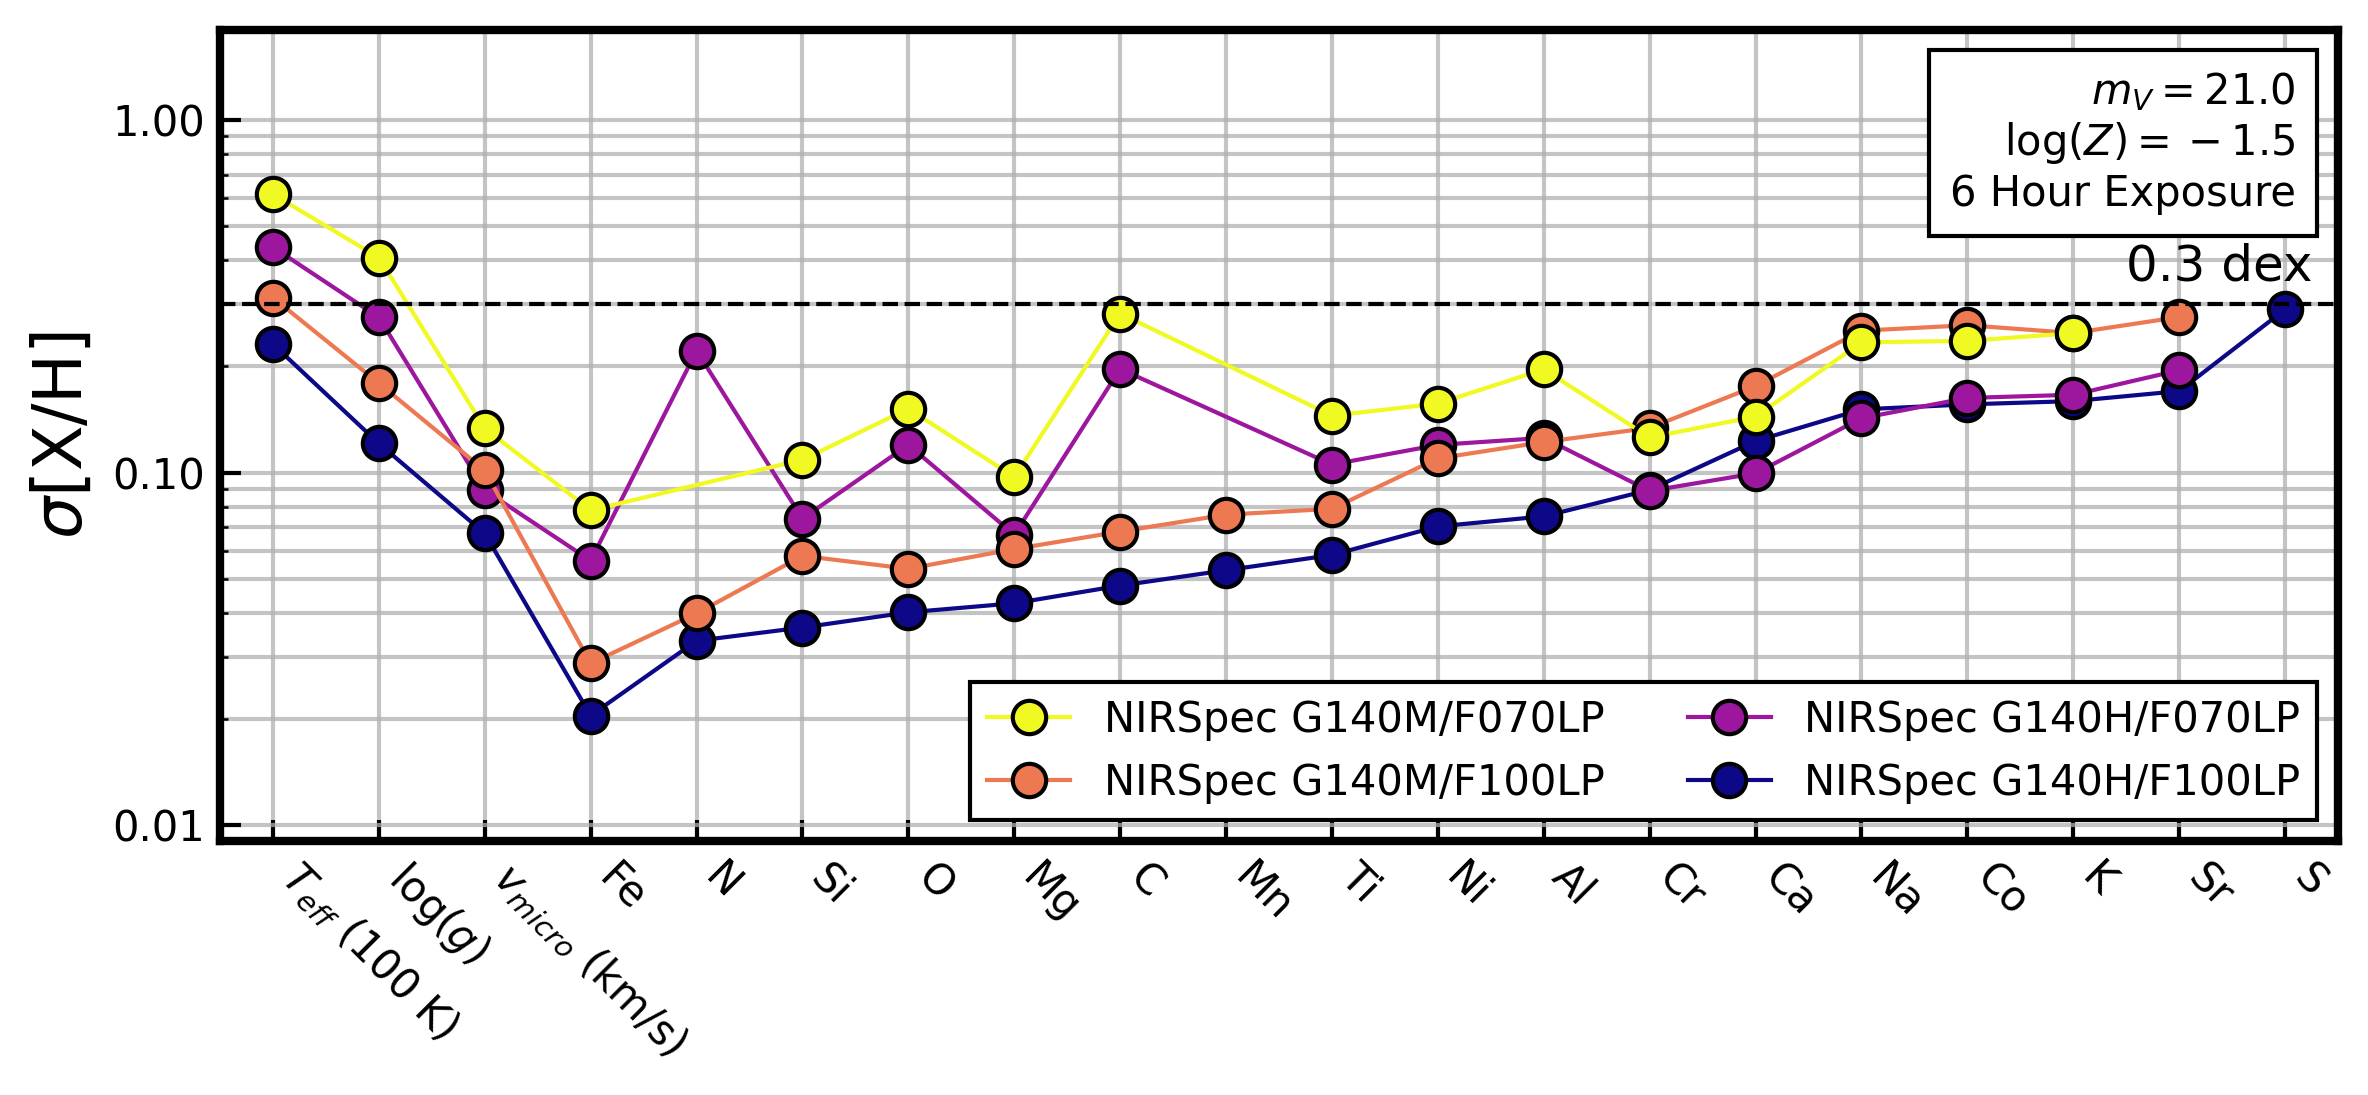

In [4]:
fig = plot_crlb([CRLB_jwst],
                 labels=['$m_V=21.0$\n$\log(Z)=-1.5$\n6 Hour Exposure'],
                 ylim=(0.009, 1.8), panel_height=3.75, 
                 cutoff=0.3, cutoff_label_xoffset=2.5,
                 legend_loc='lower right', legend_ncol=2, reverse_legend=True)
fig.savefig(output_dir+'crlb_jwst.png')

## Figure 13: Low-Resolution ELT CRLBs 

In [5]:
# Initialize Preset Instrument
gmacs_g2 = inst.InstConfig('GMACS (G2)', res=1000, samp=3, start=3200, end=10000)
gmacs_g3b = inst.InstConfig('GMACS (G3b)', res=2500, samp=3, start=3700, end=5500)
gmacs_g3r = inst.InstConfig('GMACS (G3r)', res=2500, samp=3, start=6100, end=8900)
gmacs_g4b = inst.InstConfig('GMACS (G4b)', res=5000, samp=3, start=4200, end=5000)
gmacs_g4r = inst.InstConfig('GMACS (G4r)', res=5000, samp=3, start=6700, end=8300)
mosaic_vis = inst.InstConfig('MOSAIC (HMM-Vis)', res=5000, samp=4, start=4500, end=8000)
mosaic_nir = inst.InstConfig('MOSAIC (HMM-NIR)', res=5000, samp=3, start=8000, end=18000)
wfos_b1210 = inst.InstConfig('WFOS (B1210)', res=1500, samp=3, start=3100, end=5500)
wfos_r680 = inst.InstConfig('WFOS (R680)', res=1500, samp=3, start=5500, end=10000)
wfos_b2479 = inst.InstConfig('WFOS (B2479)', res=3200, samp=3, start=3300, end=4750)
wfos_r1392 = inst.InstConfig('WFOS (R1392)', res=3200, samp=3, start=5850, end=8400)
wfos_b3600 = inst.InstConfig('WFOS (B3600)', res=5000, samp=3, start=3250, end=4100)
wfos_r2052 = inst.InstConfig('WFOS (R2052)', res=5000, samp=3, start=5750, end=7250)

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(gmacs_g2)
RGB.convolve(gmacs_g3b)
RGB.convolve(gmacs_g3r)
RGB.convolve(gmacs_g4b)
RGB.convolve(gmacs_g4r)
RGB.convolve(mosaic_vis)
RGB.convolve(mosaic_nir)
RGB.convolve(wfos_b1210)
RGB.convolve(wfos_r680)
RGB.convolve(wfos_b2479)
RGB.convolve(wfos_r1392)
RGB.convolve(wfos_b3600)
RGB.convolve(wfos_r2052)

# Calculate Gradient Spectra
RGB.calc_gradient(gmacs_g2)
RGB.calc_gradient(gmacs_g3b)
RGB.calc_gradient(gmacs_g3r)
RGB.calc_gradient(gmacs_g4b)
RGB.calc_gradient(gmacs_g4r)
RGB.calc_gradient(mosaic_vis)
RGB.calc_gradient(mosaic_nir)
RGB.calc_gradient(wfos_b1210)
RGB.calc_gradient(wfos_r680)
RGB.calc_gradient(wfos_b2479)
RGB.calc_gradient(wfos_r1392)
RGB.calc_gradient(wfos_b3600)
RGB.calc_gradient(wfos_r2052)

# Set S/N for All Instruments
# GMACS
gmacs_snr_blue = np.genfromtxt('./etc_files/gmacs_1h_V19.5_blue.txt').T
gmacs_snr_red1 = np.genfromtxt('./etc_files/gmacs_1h_V19.5_red1.txt').T
gmacs_snr_red2 = np.genfromtxt('./etc_files/gmacs_1h_V19.5_red2.txt').T
gmacs_snr = np.concatenate([gmacs_snr_blue, gmacs_snr_red1, gmacs_snr_red2], axis=1)
gmacs_snr_R = gmacs_snr[0] / 1.4
gmacs_snr_1000 = np.copy(gmacs_snr)
gmacs_snr_2500 = np.copy(gmacs_snr)
gmacs_snr_5000 = np.copy(gmacs_snr)
gmacs_snr_1000[1] *= (1000/gmacs_snr_R)**(-1/2)
gmacs_snr_2500[1] *= (2500/gmacs_snr_R)**(-1/2)
gmacs_snr_5000[1] *= (5000/gmacs_snr_R)**(-1/2)
gmacs_g2.set_snr(gmacs_snr_1000, fill_value='extrapolate')
gmacs_g3b.set_snr(gmacs_snr_2500, fill_value='extrapolate')
gmacs_g3r.set_snr(gmacs_snr_2500, fill_value='extrapolate')
gmacs_g4b.set_snr(gmacs_snr_5000, fill_value='extrapolate')
gmacs_g4r.set_snr(gmacs_snr_5000, fill_value='extrapolate')
# MOSAIC HMM-VIS (from GMACS)
mosaic_vis_snr = np.copy(gmacs_snr_5000)
mosaic_vis_snr[1] *= (39/24.5) *(4/3)**(-1/2)  # scale by D and n
mosaic_vis.set_snr(mosaic_vis_snr, fill_value='extrapolate')
# MOSAIC HMM-NIR (from JWST)
hdul = fits.open('./etc_files/jwst_h070_v19.5_rgb.fits')
tmp1 = np.array([hdul[1].data['WAVELENGTH']*1e4, hdul[1].data['SN']])
hdul = fits.open('./etc_files/jwst_h100_v19.5_rgb.fits')
tmp2 = np.array([hdul[1].data['WAVELENGTH']*1e4, hdul[1].data['SN']])
mosaic_nir_snr = np.concatenate([tmp1, tmp2[:, tmp2[0]>12700]], axis=1)
mosaic_nir_snr[1][np.isinf(mosaic_nir_snr[1])] \
    = np.mean(mosaic_nir_snr[1][(mosaic_nir_snr[0]>12000) \
              & (mosaic_nir_snr[0]<14000) \
              & np.isfinite(mosaic_nir_snr[1])])  # Fill JWST detector gap
mosaic_nir_snr[1] *= (39/6.5) * (5000/2700)**(-1/2)  # scale by R and D
mosaic_nir.set_snr(mosaic_nir_snr, fill_value='extrapolate')
# WFOS (from GMACS)
with io.capture_output() as captured:  # Supress calculation stdout
    wfos_snr_1, wfos_resolution_1 = s2n.calculate_wfos_snr(spec_file='etc_files/RGB_m1.5_R300000.txt',
                                                           spec_wave_units='nm', spec_wave=0, spec_flux_units='erg/s/cm2/angstrom', spec_flux=1,
                                                           spec_res_value=300000, mag=19.8, mag_band='g', mag_system='AB', snr_units='pixel',
                                                           exptime=3600, airmass=1.1, fwhm=0.75,
                                                           blue_grat='B1210', red_grat='R680', return_R=True)
    wfos_snr_2, wfos_resolution_2 = s2n.calculate_wfos_snr(spec_file='etc_files/RGB_m1.5_R300000.txt',
                                                           spec_wave_units='nm', spec_wave=0, spec_flux_units='erg/s/cm2/angstrom', spec_flux=1,
                                                           spec_res_value=300000, mag=19.8, mag_band='g', mag_system='AB', snr_units='pixel',
                                                           exptime=3600, airmass=1.1, fwhm=0.75,
                                                           blue_grat='B2479', red_grat='R1392', return_R=True)
    wfos_snr_3, wfos_resolution_3 = s2n.calculate_wfos_snr(spec_file='etc_files/RGB_m1.5_R300000.txt',
                                                           spec_wave_units='nm', spec_wave=0, spec_flux_units='erg/s/cm2/angstrom', spec_flux=1,
                                                           spec_res_value=300000, mag=19.8, mag_band='g', mag_system='AB', snr_units='pixel',
                                                           exptime=3600, airmass=1.1, fwhm=0.75,
                                                           blue_grat='B3600', red_grat='R2052', return_R=True)
wfos_snr_1[1] *= (1500/wfos_resolution_1[1])**(-1/2)
wfos_snr_2[1] *= (3200/wfos_resolution_2[1])**(-1/2)
wfos_snr_3[1] *= (5000/wfos_resolution_3[1])**(-1/2)
wfos_b1210.set_snr(wfos_snr_1, fill_value='extrapolate')
wfos_r680.set_snr(wfos_snr_1, fill_value='extrapolate')
wfos_b2479.set_snr(wfos_snr_2, fill_value='extrapolate')
wfos_r1392.set_snr(wfos_snr_2, fill_value='extrapolate')
wfos_b3600.set_snr(wfos_snr_3, fill_value='extrapolate')
wfos_r2052.set_snr(wfos_snr_3, fill_value='extrapolate')

# Initialize CRLB Data Frames
CRLB_lowres_ELT1 = init_crlb_df(RGB)
CRLB_lowres_ELT2 = init_crlb_df(RGB)
CRLB_lowres_ELT3 = init_crlb_df(RGB)

# Calculate CRLBs
CRLB_lowres_ELT1['GMACS (G2)'] = calc_crlb(RGB, [gmacs_g2])
CRLB_lowres_ELT1['GMACS (G3)'] = calc_crlb(RGB, [gmacs_g3b, gmacs_g3r])
CRLB_lowres_ELT1['GMACS (G4)'] = calc_crlb(RGB, [gmacs_g4b, gmacs_g4r])
CRLB_lowres_ELT2['MOSAIC (HMM-Vis)'] = calc_crlb(RGB, [mosaic_vis])
CRLB_lowres_ELT2['MOSAIC (HMM-NIR)'] = calc_crlb(RGB, [mosaic_nir])
CRLB_lowres_ELT3['WFOS (B1210/R680)'] = calc_crlb(RGB, [wfos_b1210, wfos_r680])
CRLB_lowres_ELT3['WFOS (B2479/R1392)'] = calc_crlb(RGB, [wfos_b2479, wfos_r1392])
CRLB_lowres_ELT3['WFOS (B3600/R2052)'] = calc_crlb(RGB, [wfos_b3600, wfos_r2052])

# Sort CRLBs & Pretty Up Indices
CRLB_lowres_ELT1 = sort_crlb(CRLB_lowres_ELT1, cutoff=0.3, fancy_labels=True)
CRLB_lowres_ELT2 = sort_crlb(CRLB_lowres_ELT2, cutoff=0.3, fancy_labels=True)
CRLB_lowres_ELT3 = sort_crlb(CRLB_lowres_ELT3, cutoff=0.3, fancy_labels=True)

/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/utils.py:160: UserWarning: outwave ((8000.0, 18000.76954618115)) extends beyond input wave ((3000.0040572, 17999.9801449))
  UserWarning


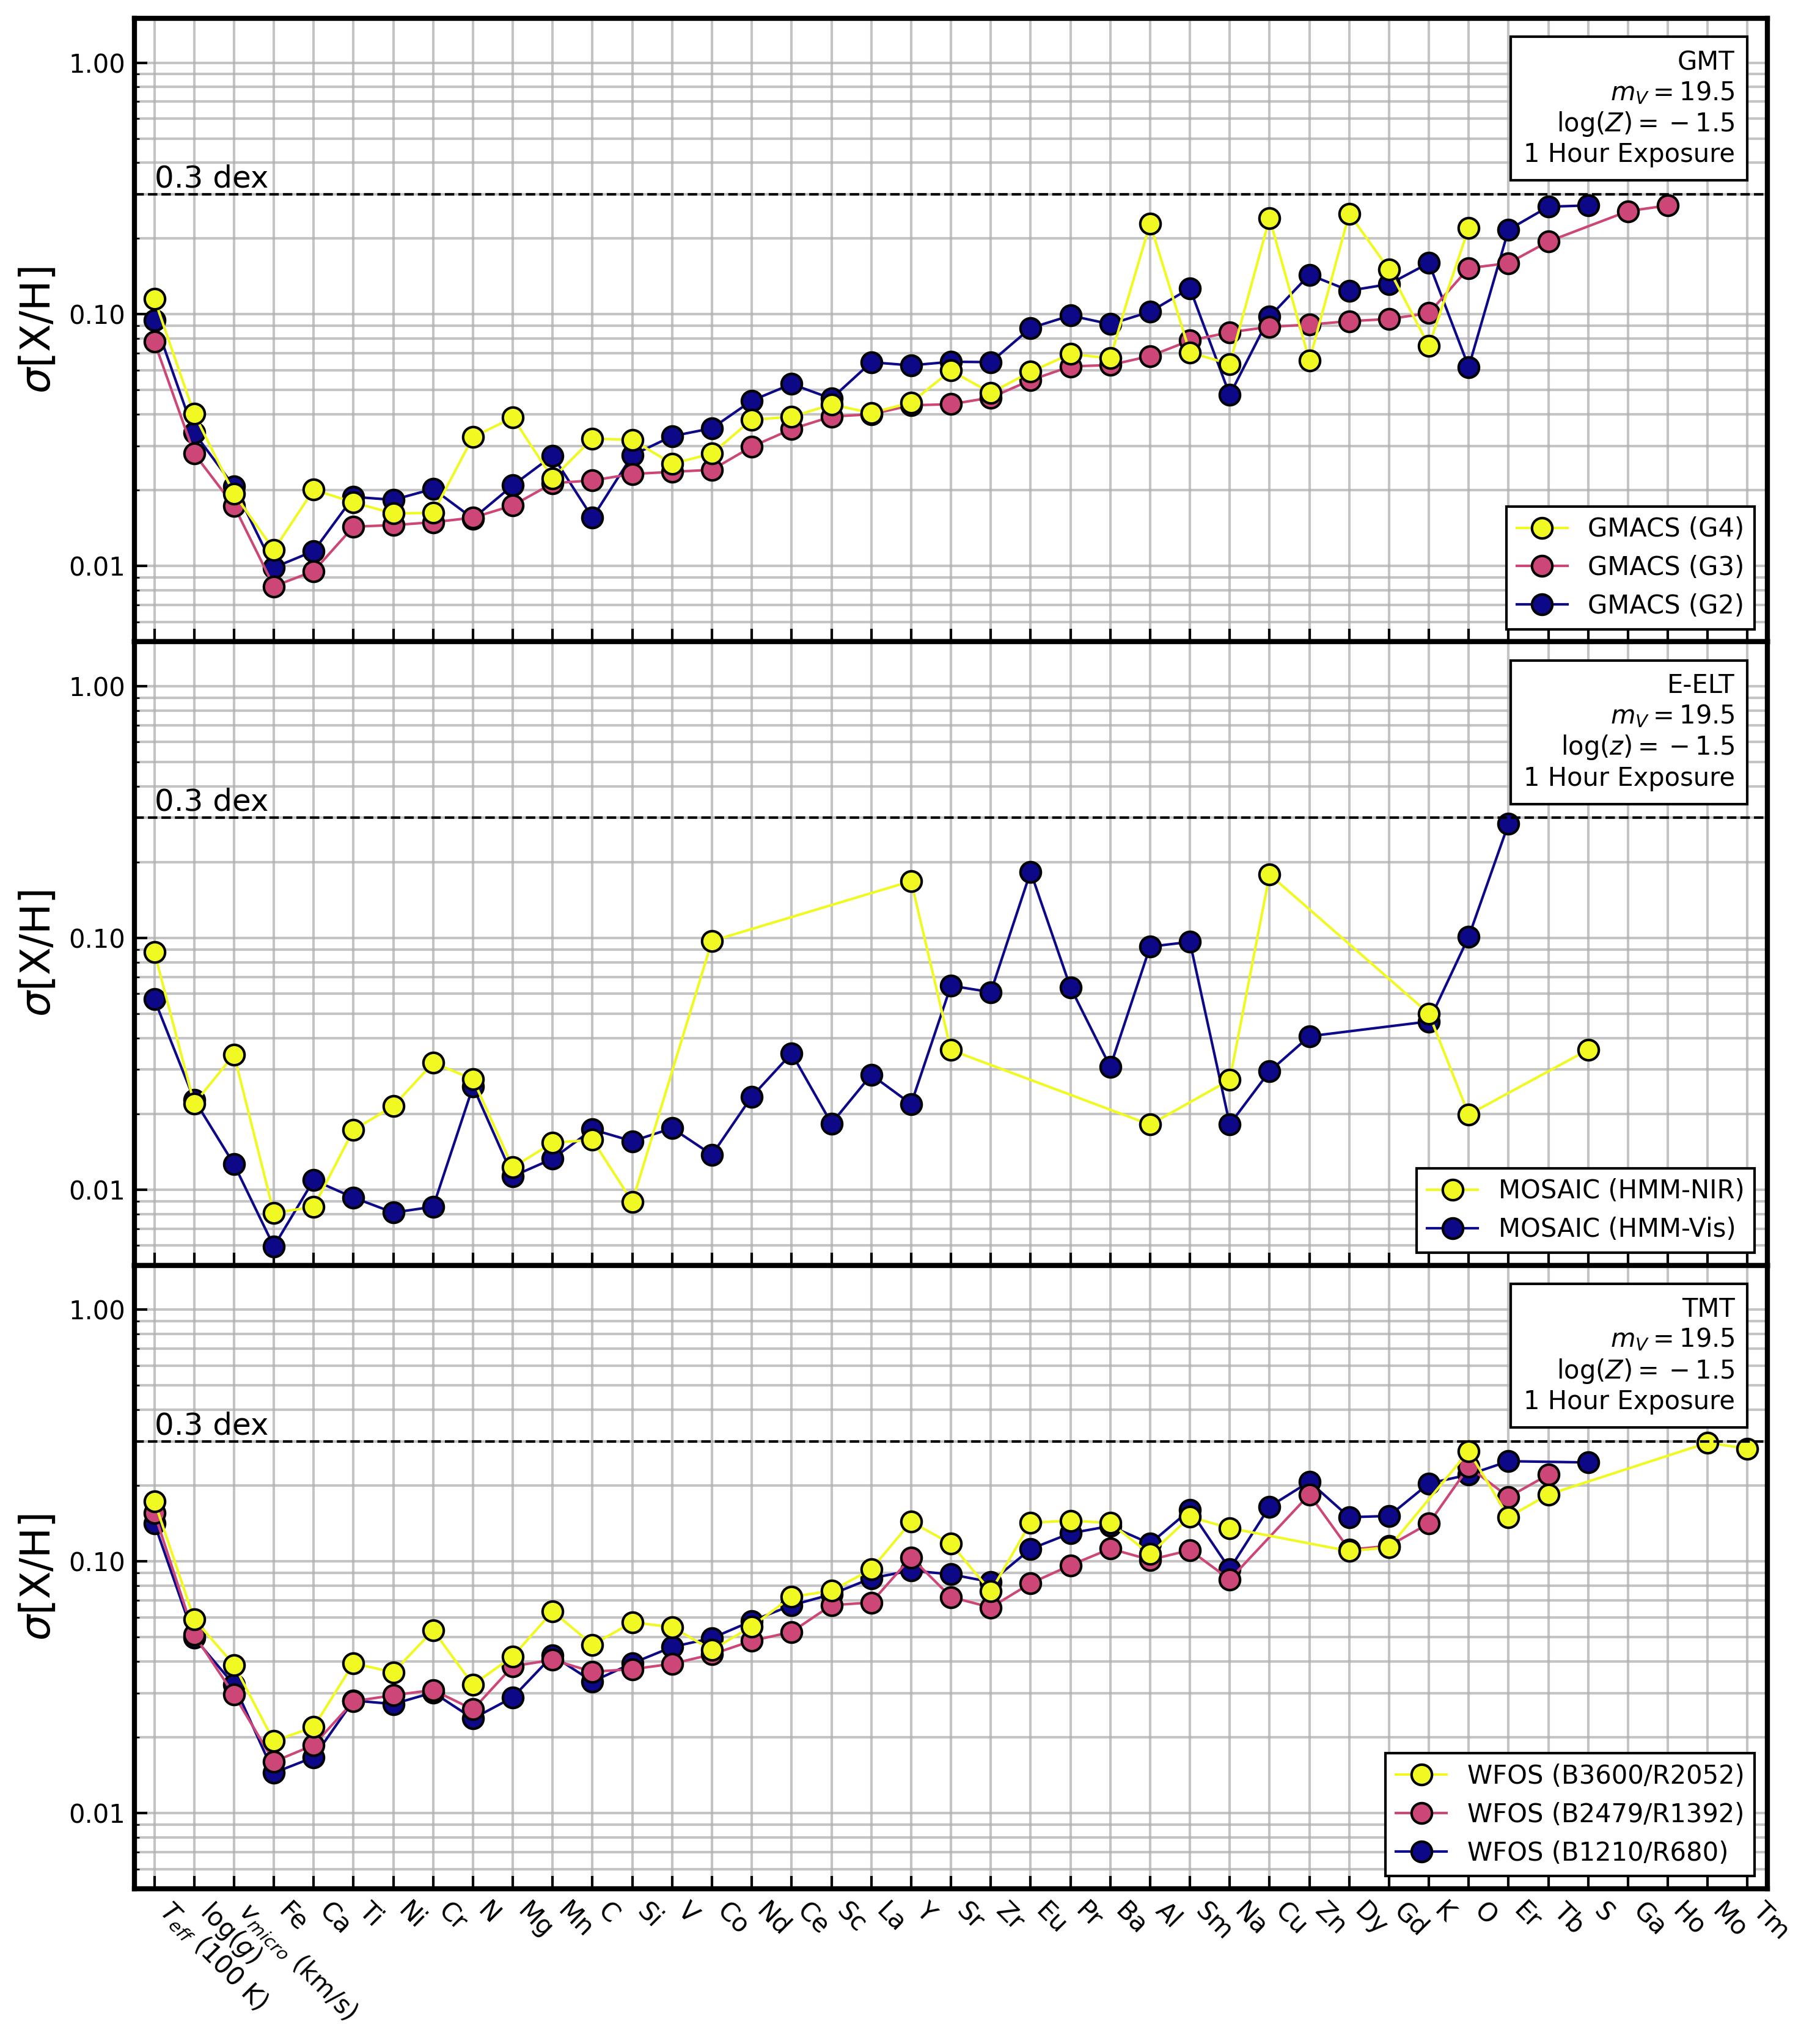

In [6]:
fig = plot_crlb([CRLB_lowres_ELT1, CRLB_lowres_ELT2, CRLB_lowres_ELT3],
                 labels=['GMT\n$m_V=19.5$\n$\log(Z)=-1.5$\n1 Hour Exposure',
                         'E-ELT\n$m_V=19.5$\n$\log(z)=-1.5$\n1 Hour Exposure',
                         'TMT\n$m_V=19.5$\n$\log(Z)=-1.5$\n1 Hour Exposure'],
                 panel_height=3.75, panel_width=10,
                 cutoff=0.3, cutoff_label_xoffset=41, cutoff_label_yoffset=0.02,
                 ylim=(0.005, 1.5),
                 legend_loc='lower right', legend_ncol=1, reverse_legend=True)
fig.savefig(output_dir+'crlb_elt1.png')

## Figure 14: High-Resolution ELT CRLBs

In [7]:
# Initialize Preset Instrument
gclef = inst.InstConfig('G-CLEF (MOS)', res=35000, samp=3, start=3500, end=9000)
hires_10 = inst.AllInst.get_spectrograph('HIRESr 1.0"')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(gclef)
RGB.convolve(hires_10)

# Calculate Gradient Spectra
RGB.calc_gradient(gclef)
RGB.calc_gradient(hires_10)

# Set S/N for All Instruments
m_V = 19.5
# HIRES 1".0
hires10_snr_query = s2n.Sig2NoiseHIRES(slitwidth='C5', exptime=6*3600,
                                       mag=19.5, magtype='Vega', band='Buser_V.dat',
                                       template='K0V_pickles_32.fits', binning='2x2',
                                       airmass=1.1, seeing=0.75, redshift=0)
hires_10.set_snr(hires10_snr_query, fill_value='extrapolate')
# GCLEF
with fits.open('./etc_files/gclef_6h_V19.5_6x9.fits') as hdul:
    gclef_snr = np.vstack([hdul[1].data['WAVE'], hdul[1].data['SNR']])
gclef.set_snr(gclef_snr, fill_value='extrapolate')

# Initialize CRLB Data Frames
CRLB_highres_ELT = init_crlb_df(RGB)

# Calculate CRLBs
CRLB_highres_ELT[gclef.name] = calc_crlb(RGB, [gclef])
CRLB_highres_ELT[hires_10.name] = calc_crlb(RGB, [hires_10])

# Sort CRLBs & Pretty Up Indices
CRLB_highres_ELT = sort_crlb(CRLB_highres_ELT, cutoff=0.3, fancy_labels=True)

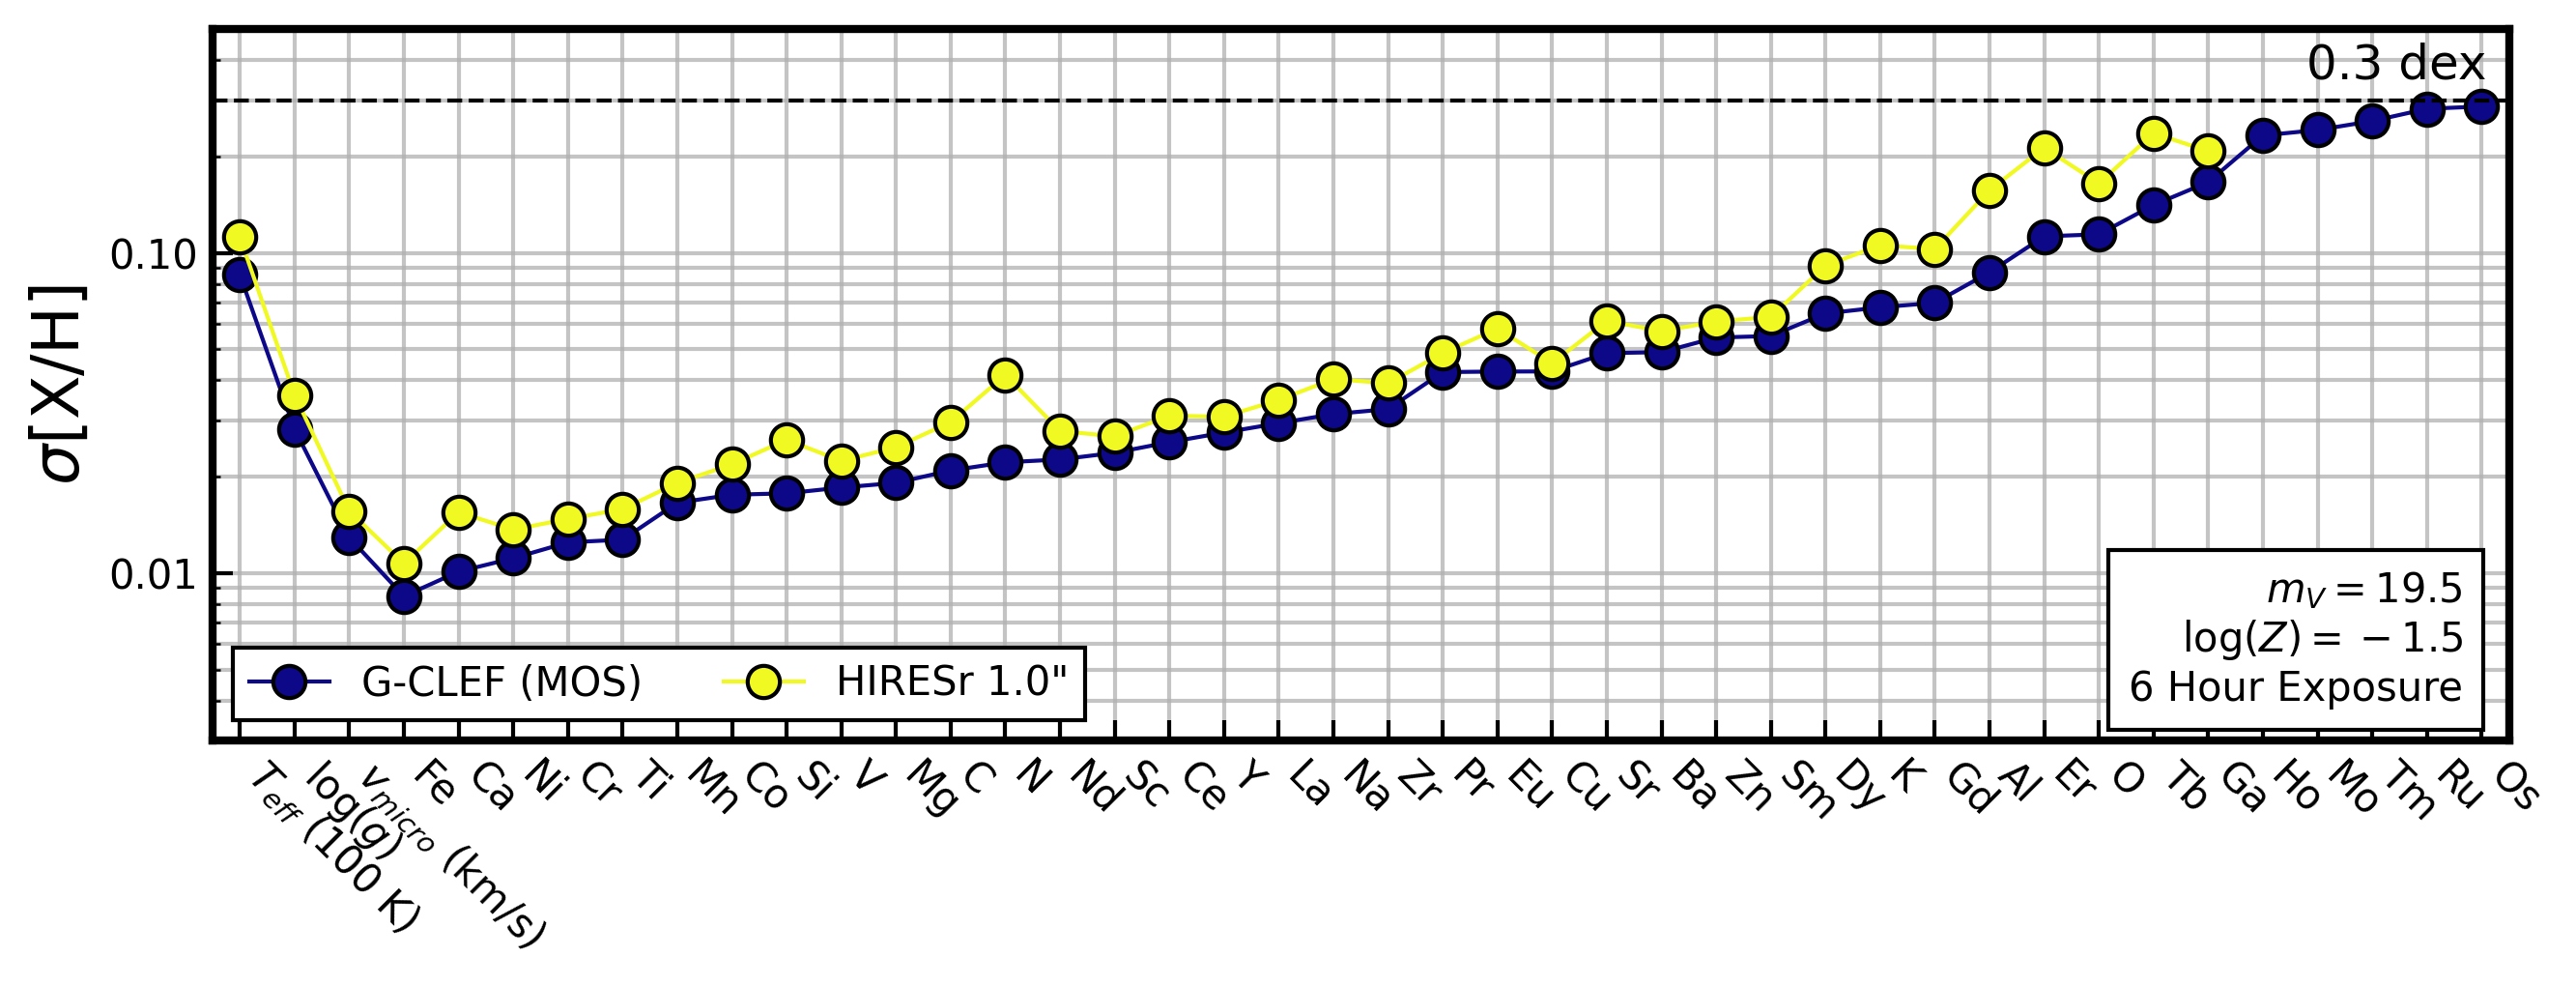

In [8]:
fig = plot_crlb([CRLB_highres_ELT],
                 labels=['$m_V=19.5$\n$\log(Z)=-1.5$\n6 Hour Exposure'],
                 ylim=(0.003, 0.5),
                 panel_height=3.5, panel_width=9, 
                 cutoff=0.3, cutoff_label_xoffset=4.2,
                 label_loc=[0.98, 0.24], legend_loc='lower left', legend_ncol=4)
fig.savefig(output_dir+'crlb_elt2.png')

## Figure 15: Extragalctic Surveys 

In [9]:
# Initialize Preset Instrument
pfs_b = inst.AllInst.get_spectrograph('PFS (b)')
pfs_rLR = inst.AllInst.get_spectrograph('PFS (r, LR)')
pfs_rMR = inst.AllInst.get_spectrograph('PFS (r, MR)')
pfs_nir = inst.AllInst.get_spectrograph('PFS (nir)')
mse_lr_b = inst.AllInst.get_spectrograph('MSE LR (b)')
mse_lr_g = inst.AllInst.get_spectrograph('MSE LR (g)')
mse_lr_r = inst.AllInst.get_spectrograph('MSE LR (r)')
mse_lr_NIR = inst.AllInst.get_spectrograph('MSE LR (nir)')
mse_mr_b = inst.AllInst.get_spectrograph('MSE MR (b)')
mse_mr_g = inst.AllInst.get_spectrograph('MSE MR (g)')
mse_mr_r = inst.AllInst.get_spectrograph('MSE MR (r)')
fobos = inst.AllInst.get_spectrograph('FOBOS')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(pfs_b)
RGB.convolve(pfs_rLR)
RGB.convolve(pfs_rMR)
RGB.convolve(pfs_nir)
RGB.convolve(mse_lr_b)
RGB.convolve(mse_lr_g)
RGB.convolve(mse_lr_r)
RGB.convolve(mse_lr_NIR)
RGB.convolve(mse_mr_b)
RGB.convolve(mse_mr_g)
RGB.convolve(mse_mr_r)
RGB.convolve(fobos)

# Calculate Gradient Spectra
RGB.calc_gradient(pfs_b)
RGB.calc_gradient(pfs_rLR)
RGB.calc_gradient(pfs_rMR)
RGB.calc_gradient(pfs_nir)
RGB.calc_gradient(mse_lr_b)
RGB.calc_gradient(mse_lr_g)
RGB.calc_gradient(mse_lr_r)
RGB.calc_gradient(mse_lr_NIR)
RGB.calc_gradient(mse_mr_b)
RGB.calc_gradient(mse_mr_g)
RGB.calc_gradient(mse_mr_r)
RGB.calc_gradient(fobos)


# Set S/N for All Instruments
# PFS
pfs_blue_etc = np.genfromtxt('./etc_files/pfs_blue.dat', skip_header=13,
                             names=['arm', 'pix', 'wave', 'snr', 'snr_single',
                                    'noise_var_single', 'noise_var_single_obj',
                                    'input_spec', 'fluxdensity_to_e', 'samp',
                                    'sky_background'])
pfs_redLR_etc = np.genfromtxt('./etc_files/pfs_redLR.dat', skip_header=13,
                              names=['arm', 'pix', 'wave', 'snr', 'snr_single',
                                     'noise_var_single', 'noise_var_single_obj',
                                     'input_spec', 'fluxdensity_to_e', 'samp',
                                     'sky_background'])
pfs_redMR_etc = np.genfromtxt('./etc_files/pfs_redMR.dat', skip_header=13,
                              names=['arm', 'pix', 'wave', 'snr', 'snr_single',
                                     'noise_var_single', 'noise_var_single_obj',
                                     'input_spec', 'fluxdensity_to_e', 'samp',
                                     'sky_background'])
pfs_nir_etc = np.genfromtxt('./etc_files/pfs_nir.dat', skip_header=13,
                            names=['arm', 'pix', 'wave', 'snr', 'snr_single',
                                   'noise_var_single', 'noise_var_single_obj',
                                   'input_spec', 'fluxdensity_to_e', 'samp',
                                   'sky_background'])
pfs_blue_etc = pfs_blue_etc[pfs_blue_etc['arm']==0]
pfs_redLR_etc = pfs_redLR_etc[pfs_redLR_etc['arm']==1]
pfs_redMR_etc = pfs_redMR_etc[pfs_redMR_etc['arm']==3]
pfs_nir_etc = pfs_nir_etc[pfs_nir_etc['arm']==2]
pfs_blue_etc = np.vstack([pfs_blue_etc['wave']*10, pfs_blue_etc['snr']])
pfs_redLR_etc = np.vstack([pfs_redLR_etc['wave']*10, pfs_redLR_etc['snr']])
pfs_redMR_etc = np.vstack([pfs_redMR_etc['wave']*10, pfs_redMR_etc['snr']])
pfs_nir_etc = np.vstack([pfs_nir_etc['wave']*10, pfs_nir_etc['snr']])
pfs_b.set_snr(pfs_blue_etc, fill_value='extrapolate')
pfs_rLR.set_snr(pfs_redLR_etc, fill_value='extrapolate')
pfs_rMR.set_snr(pfs_redMR_etc, fill_value='extrapolate')
pfs_nir.set_snr(pfs_nir_etc, fill_value='extrapolate')
# MSE
mse_lr_snr_query = s2n.Sig2NoiseMSE(exptime=3600, mag=19.8, filter='g',
                                    template='k2v', src_type='point', spec_mode='LR',
                                    airmass="1.0", seeing=0.75, redshift=0)
mse_mr_snr_query = s2n.Sig2NoiseMSE(exptime=3600, mag=19.8, filter='g',
                                    template='k2v', src_type='point', spec_mode='MR',
                                    airmass="1.0", seeing=0.75, redshift=0)
mse_lr_b.set_snr(mse_lr_snr_query, fill_value='extrapolate')
mse_lr_g.set_snr(mse_lr_snr_query, fill_value='extrapolate')
mse_lr_r.set_snr(mse_lr_snr_query, fill_value='extrapolate')
mse_lr_NIR.set_snr(mse_lr_snr_query, fill_value='extrapolate')
mse_mr_b.set_snr(mse_mr_snr_query, fill_value='extrapolate')
mse_mr_g.set_snr(mse_mr_snr_query, fill_value='extrapolate')
mse_mr_r.set_snr(mse_mr_snr_query, fill_value='extrapolate')
mse_lr_b.snr *= (3)**(-1/2)
mse_lr_g.snr *= (3)**(-1/2)
mse_lr_r.snr *= (3)**(-1/2)
mse_lr_NIR.snr *= (3)**(-1/2)
mse_mr_b.snr *= (3)**(-1/2)
mse_mr_g.snr *= (3)**(-1/2)
mse_mr_r.snr *= (3)**(-1/2)
# FOBOS (from MSE)
with io.capture_output() as captured:  # Supress calculation stdout
    fobos_snr = s2n.calculate_fobos_snr(spec_file='etc_files/RGB_m1.5_R300000.txt',
                                        spec_wave_units='nm', spec_wave=0, spec_flux_units='erg/s/cm2/angstrom', spec_flux=1,
                                        spec_res_value=300000, mag=19.8, mag_band='g', mag_system='AB', snr_units='pixel',
                                        airmass=1.1, fwhm=0.75,
                                        exptime=3600, spot_fwhm=6)
fobos.set_snr(fobos_snr, fill_value='extrapolate')

# Initialize CRLB Data Frames
CRLB_surveys = init_crlb_df(RGB)

# Calculate CRLBs
CRLB_surveys['FOBOS'] = calc_crlb(RGB, [fobos])
CRLB_surveys['MSE (Med Res)'] = calc_crlb(RGB, [mse_mr_b, mse_mr_g, mse_mr_r])
CRLB_surveys['MSE (Low Res)'] = calc_crlb(RGB, [mse_lr_b, mse_lr_g, mse_lr_r, mse_lr_NIR])
CRLB_surveys['PFS (Med Res)'] = calc_crlb(RGB, [pfs_b, pfs_rMR, pfs_nir])
CRLB_surveys['PFS (Low Res)'] = calc_crlb(RGB, [pfs_b, pfs_rLR, pfs_nir])


# Sort CRLBs & Pretty Up Indices
CRLB_surveys = sort_crlb(CRLB_surveys, cutoff=0.3, fancy_labels=True)

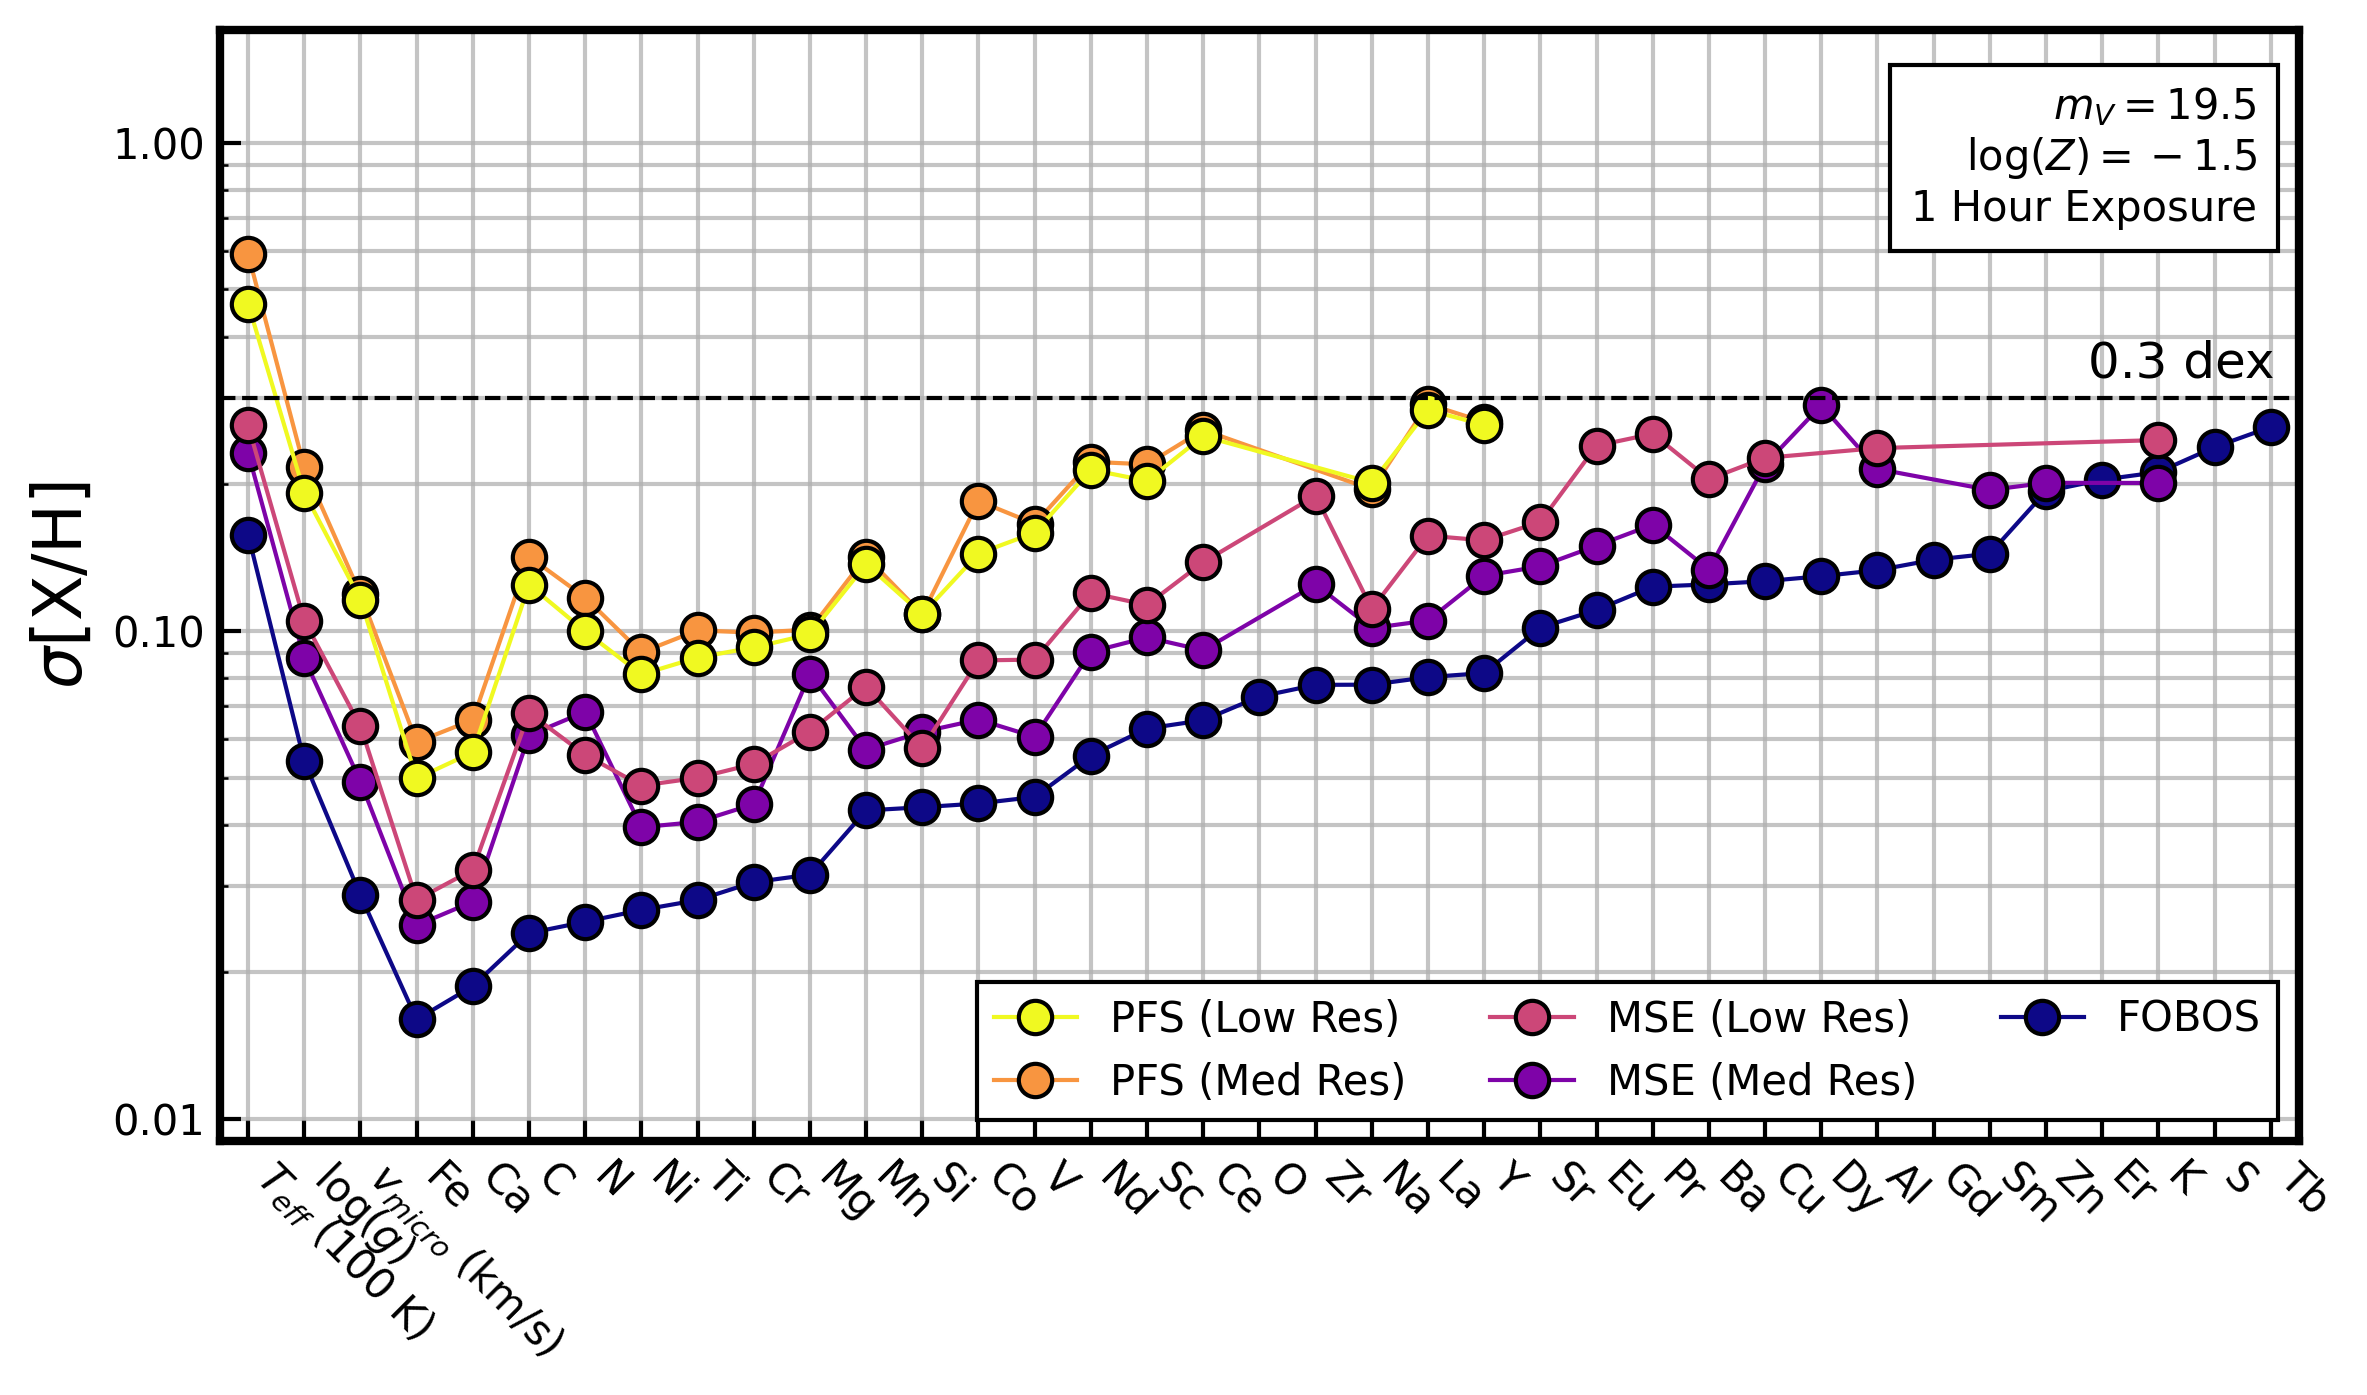

In [10]:
fig = plot_crlb([CRLB_surveys],
                 labels=['$m_V=19.5$\n$\log(Z)=-1.5$\n1 Hour Exposure'],
                 panel_height=4.75,
                 cutoff=0.3, cutoff_label_xoffset=4.25, cutoff_label_yoffset=0.03,
                 legend_loc='lower right', legend_ncol=3, reverse_legend=True)
fig.savefig(output_dir+'crlb_survey.png')